## Word Frequency


In [1]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np

#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords

# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize

# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer

# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams

# We can use counter to count the objects
from collections import Counter

# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in the dataset
df = pd.read_csv('reviews.csv')
df.dtypes

Unnamed: 0     int64
review        object
star           int64
dtype: object

In [3]:
#check the info column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   review      4989 non-null   object
 2   star        5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


In [4]:
import re
import string
# get rid of \n
df['review'] = df['review'].str.replace("\n","")

# get rid of numbers
text =lambda x: ''.join([i for i in str(x) if not i.isdigit()])

# get rid of punctuation and lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) 


df['review'] = df.review.apply(text).map(punc_lower)

df


,Unnamed: 0,review,star
0,0,i don t really care for the iphone i don t ...,4
1,1,i bought this as a trap phone since my parents...,4
2,2,i’ve had this phone for about two weeks now w...,5
3,3,old out of date phone but it gets the job don...,4
4,4,broke my iphone i had for years did not w...,5
...,...,...,...
4995,4995,came with blown out speakers easy to return t...,3
4996,4996,i love the camera quality on this phone,5
4997,4997,scratch free screen fast touch response good...,5
4998,4998,refurbished but immaculate took about min ...,5


In [5]:
# positive reviews
df_p =df[df['star']>=4].copy()

    
comments_p =" ".join(df_p['review'])
words_p =word_tokenize(comments_p)

In [6]:
#  negative reviews
df_n =df[df['star']<=2].copy()

    
comments_n =" ".join(df_n['review'])
words_n =word_tokenize(comments_n)

In [7]:
def word_frequency(sentence):
    sentence =" ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams
    

In [8]:
# positive review datasets as pair and trigrams
data2_p,data3_p,data4_p = word_frequency(df_p['review'])

In [9]:
data4_p

,trigrams,frequency
2096,"(look, brand, new)",93
843,"(like, brand, new)",93
798,"(phone, work, great)",77
8475,"(brand, new, phone)",60
8957,"(work, like, new)",47
...,...,...
18117,"(similar, transitioning, easy)",1
18118,"(transitioning, easy, giving)",1
18119,"(easy, giving, better)",1
18120,"(giving, better, sound)",1


<AxesSubplot:title={'center':'Positive Review Word Trigrams Frequency'}, xlabel='frequency', ylabel='trigrams'>

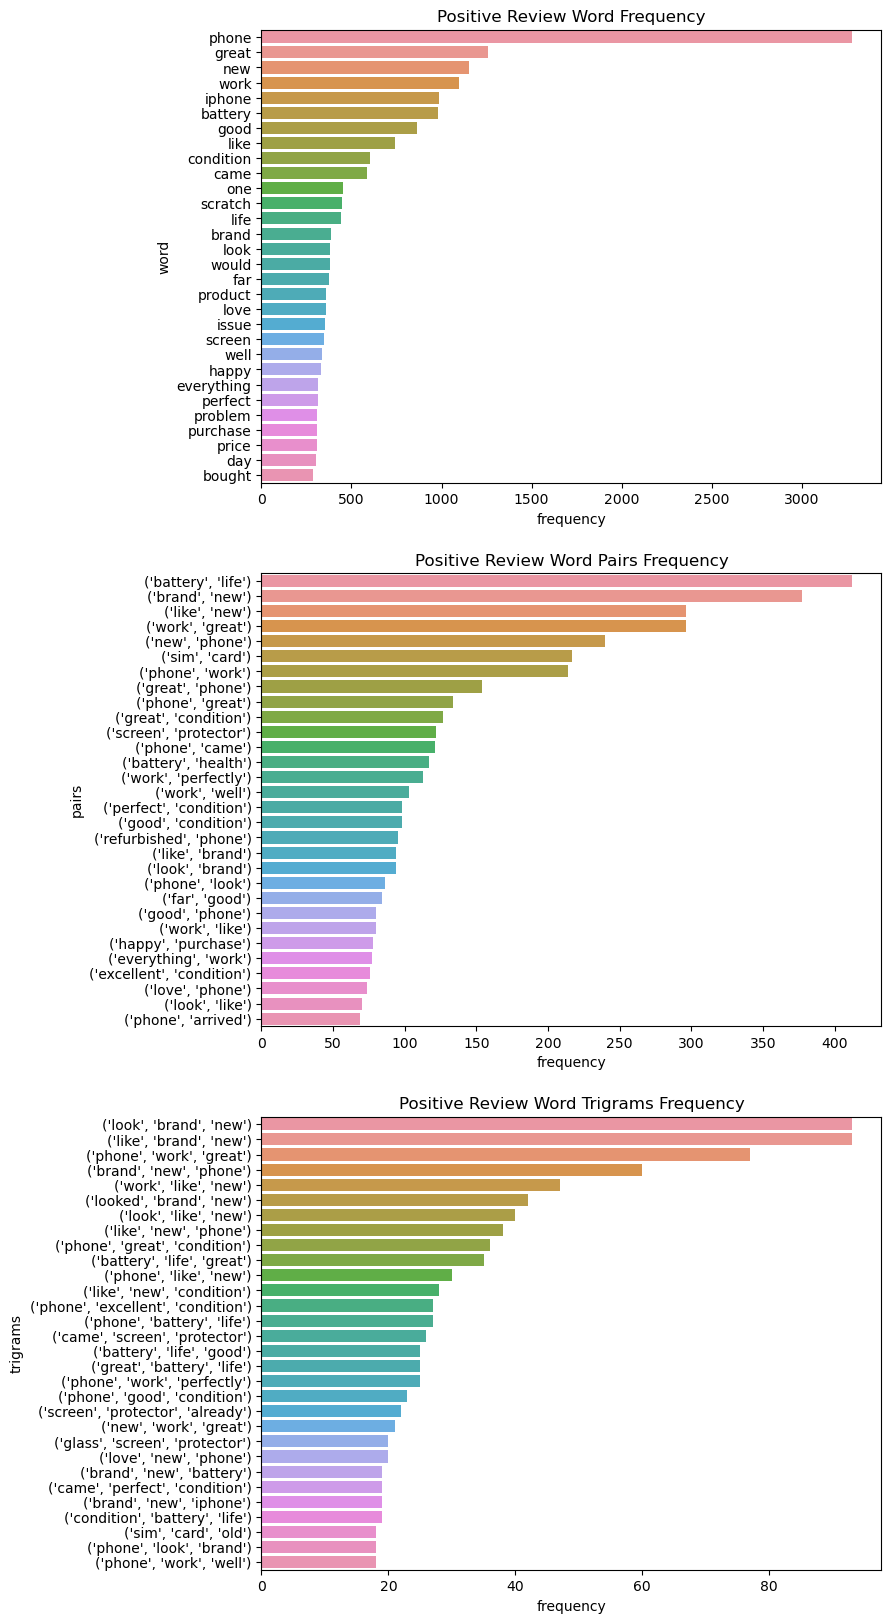

In [10]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
axes[0].set_title('Positive Review Word Frequency')
axes[1].set_title('Positive Review Word Pairs Frequency')
axes[2].set_title('Positive Review Word Trigrams Frequency')

sns.barplot(ax=axes[0],x='frequency',y='word',data=data2_p.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3_p.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4_p.head(30))

In [11]:
#  negative review dataset as pair and trigrams
data2_n,data3_n,data4_n = word_frequency(df_n['review'])

In [12]:
data4_n

,trigrams,frequency
879,"(phone, hold, charge)",9
170,"(new, sim, card)",7
2697,"(took, apple, store)",6
2416,"(medium, could, loaded)",5
6253,"(bought, refurbished, phone)",5
...,...,...
7262,"(fyi, phone, stupid)",1
7261,"(refund, fyi, phone)",1
7260,"(say, refund, fyi)",1
7259,"(returning, say, refund)",1


<AxesSubplot:title={'center':'Negative Review Word Trigrams Frequency'}, xlabel='frequency', ylabel='trigrams'>

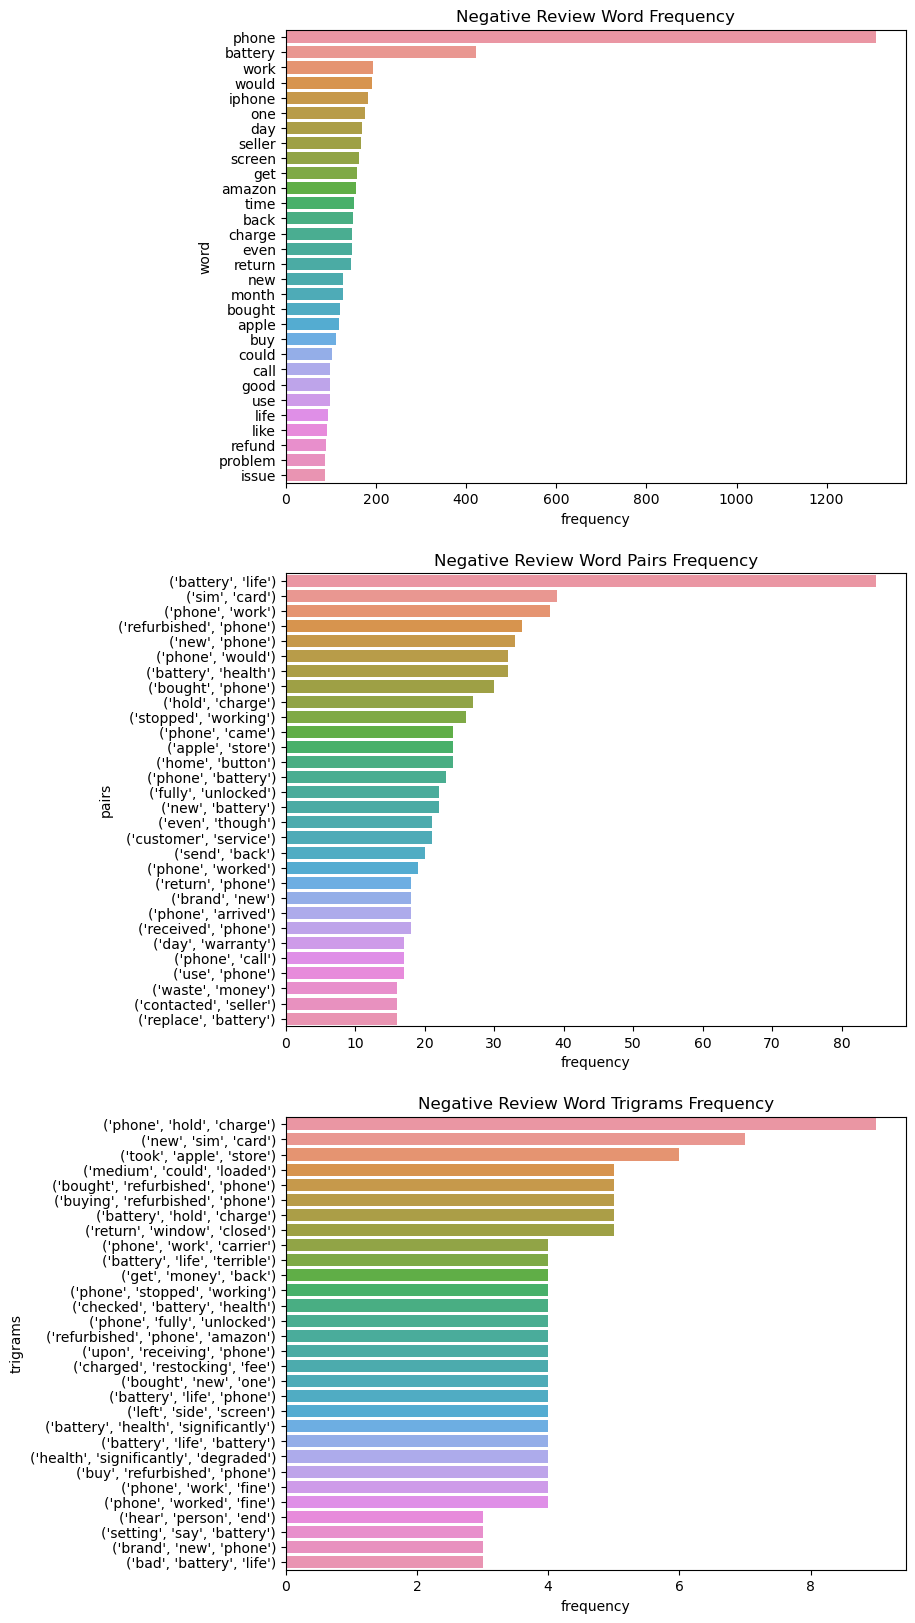

In [13]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
axes[0].set_title('Negative Review Word Frequency')
axes[1].set_title('Negative Review Word Pairs Frequency')
axes[2].set_title('Negative Review Word Trigrams Frequency')
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2_n.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3_n.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4_n.head(30))

In [ ]:
# WordClouds

In [14]:
from wordcloud import WordCloud
from PIL import Image

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zehragul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows : 


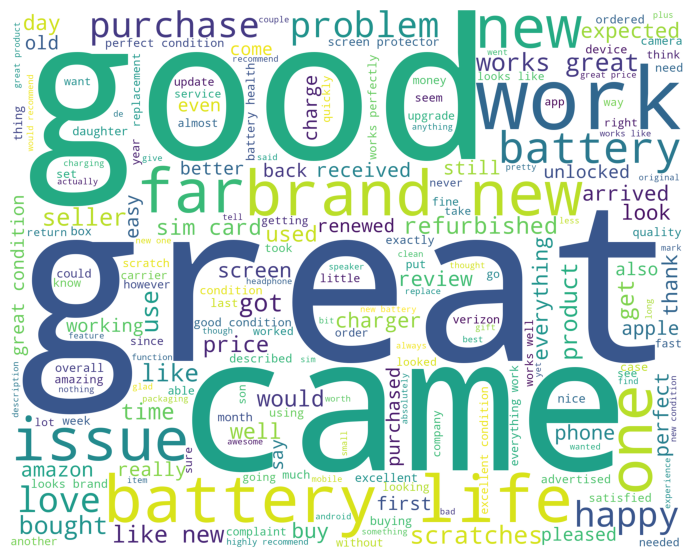

Negative words are as follows : 


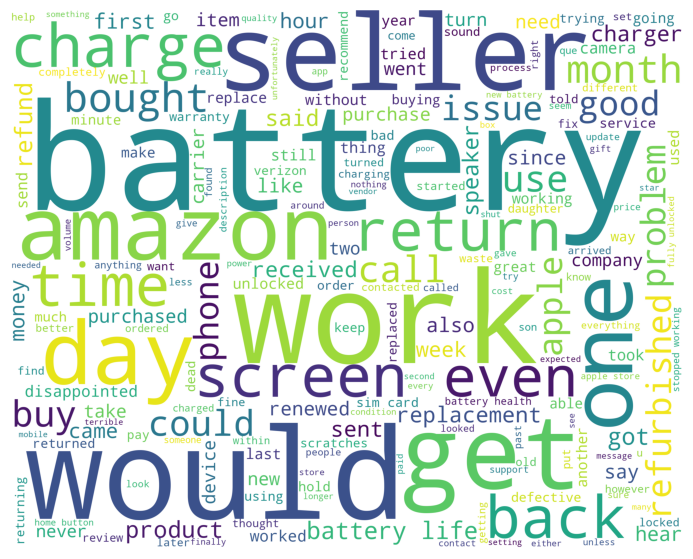

In [16]:
def wordcloud_draw(df, color = 'white'):
    words = ' '.join(df)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='phone' and word!='iphone')
                            ])
    
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows : ")
wordcloud_draw(df_p['review'])
print("Negative words are as follows : ")
wordcloud_draw(df_n['review'])